# Obesity Risk Prediction – Logistic Regression

## 1.  OBJECTIVES:
Predict obesity levels of individuals and  implement logistic regression with multi-class strategies (One-vs-All and One-vs-One) and evaluate model performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

## 2. DATASET AND METHOD
The dataset being used for this lab is the "Obesity Risk Prediction" dataset publically available on UCI Library under the CCA 4.0 license. 
You can download it here: Dataset: [Obesity Level Prediction Dataset - UCI](https://archive.ics.uci.edu/ml/datasets/Obesity+Level+Prediction)(dataset included in the IBM Data Science Professional Certificate)


In [2]:
# read  into a pandas dataframe:
obesity_data = pd.read_csv("Obesity_level_prediction_dataset.csv")
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The data set has 17 attributes in total along with 2111 samples: 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


In [3]:
obesity_data.shape

(2111, 17)

In [4]:
# check missing values
print(obesity_data.isnull().sum()) 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
# Dataset summary
print(obesity_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
obesity_data.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


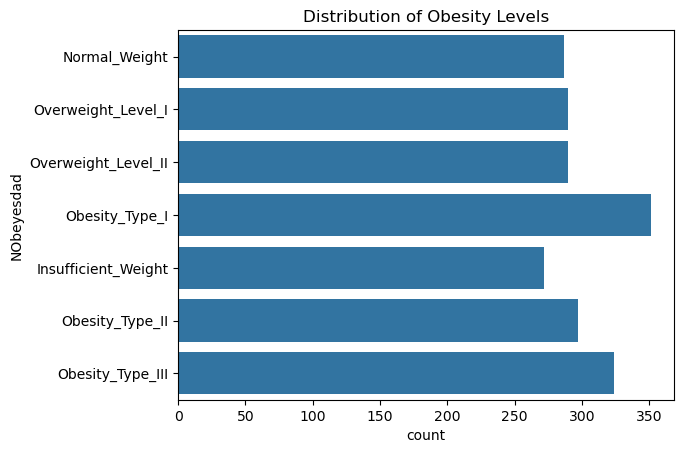

In [7]:
# Distribution of target variable
sns.countplot(y='NObeyesdad', data=obesity_data)
plt.title('Distribution of Obesity Levels')
plt.show()

The dataset shows a fairly balanced distribution across obesity levels. The model will therefore not be biased toward any dominant class. In healthcare contexts, this balance allows reliable predictions for both moderate and severe overweight. 

## 3. DATA PREPROCESSING
### 3.1 Standardization of Continuous Variables
Standardization ensures features are on the same scale, improving model performance.

In [8]:
# Standardizing continuous numerical features
continuous_columns = obesity_data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(obesity_data[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([obesity_data.drop(columns=continuous_columns), scaled_df], axis=1)

### 3.2 One-Hot Encoding of Categorical Variables

In [9]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

In [10]:
# the overall number of fields is increased to 24.
print(prepped_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NObeyesdad                          2111 non-null   object 
 1   Age                                 2111 non-null   float64
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   FCVC                                2111 non-null   float64
 5   NCP                                 2111 non-null   float64
 6   CH2O                                2111 non-null   float64
 7   FAF                                 2111 non-null   float64
 8   TUE                                 2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  family_history_with_overweight_yes  2111 non-null   float64
 11  FAVC_yes                            2111 no

### 3.3 Encode Target Variable

In [11]:
# Encoding the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 4. MODEL TRAINING AND EVALUATION

In [12]:
## Separate the input and target data
# Preparing final dataset
X = prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

In [13]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5. LOGISTIC REGRESSION -  One-vs-All

In [14]:
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

C:\Users\UTENTE\anaconda3\envs\py310copygeopandas\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [15]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

In [16]:
print("=== One-vs-All (OvA) ===")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ova, target_names=obesity_data['NObeyesdad'].astype('category').cat.categories))


=== One-vs-All (OvA) ===
Accuracy: 76.12%

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.96      0.93        54
      Normal_Weight       0.71      0.60      0.65        58
     Obesity_Type_I       0.63      0.74      0.68        70
    Obesity_Type_II       0.85      0.97      0.91        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.61      0.59      0.60        58
Overweight_Level_II       0.59      0.47      0.52        58

           accuracy                           0.76       423
          macro avg       0.76      0.76      0.75       423
       weighted avg       0.76      0.76      0.76       423



* The OvA model achieves 76.12% accuracy, performing well overall but showing some confusion between neighboring obesity classes. Extreme classes (Insufficient_Weight, Obesity_Type_III) are predicted very well.
* Clases in the middle (e.g., Overweight_Level_II) are more difficult to predict (f1= 0.52).
Clinically, this means that the model is reliable for identifying high or low risk, but less reliable for distinguishing light/moderate overweight.

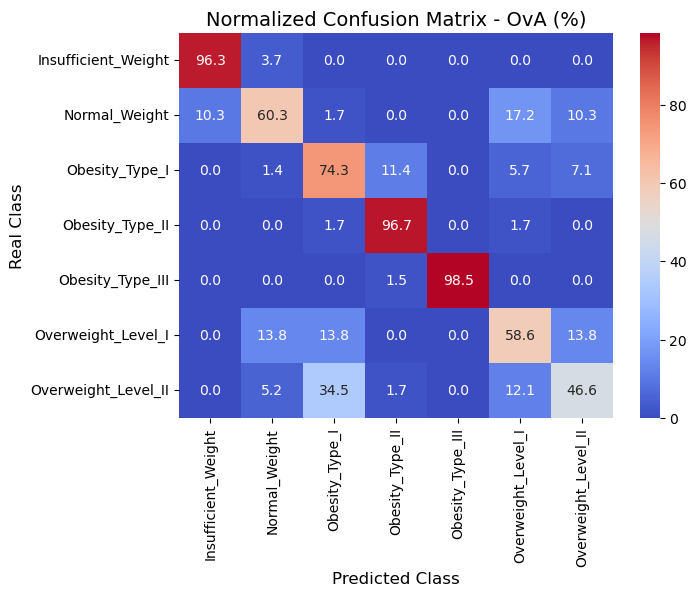

In [17]:
# Normalized Confusion matrix
cm_ova = confusion_matrix(y_test, y_pred_ova, normalize='true') * 100

plt.figure(figsize=(7,5))
sns.heatmap(cm_ova, annot=True, fmt='.1f', cmap='coolwarm',
           xticklabels=obesity_data['NObeyesdad'].astype('category').cat.categories,
           yticklabels=obesity_data['NObeyesdad'].astype('category').cat.categories)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Real Class", fontsize=12)
plt.title("Normalized Confusion Matrix - OvA (%)", fontsize=14)
plt.show()

The majority of the predictions are located along the diagonal. Most misclassifications occur mainly between neighboring obesity classes (e.g., Overweight , Obesity Type_I), which is reasonable. 

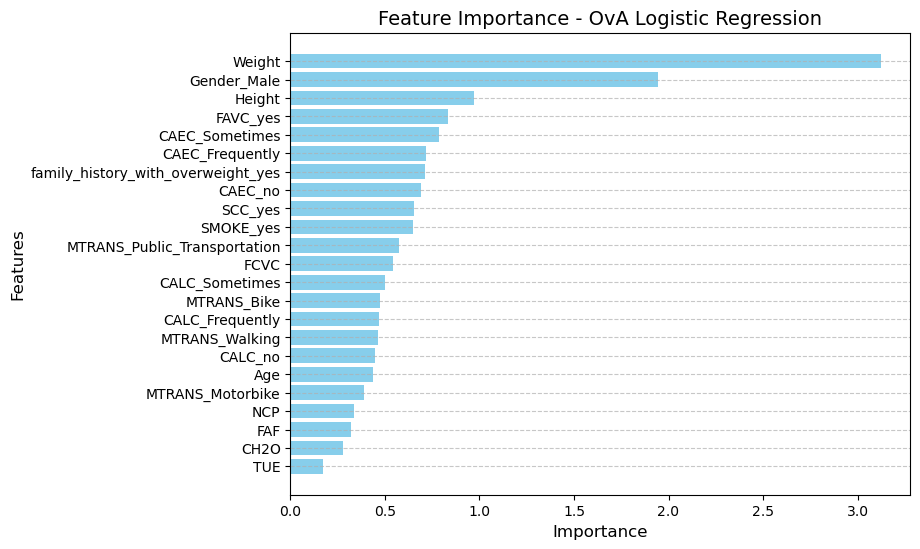

Top 3 most important features for OvA model: ['Weight', 'Gender_Male', 'Height']


In [18]:
# Coefficients reflect association strength after standardization, not causal impact
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8,6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.gca().invert_yaxis() # the most important at the top 
plt.title("Feature Importance - OvA Logistic Regression", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top3_features = X.columns[sorted_idx][:3]
print("Top 3 most important features for OvA model:", list(top3_features))

* Key features driving predictions are Weight, Gender_Male and Height. Weight is directly correlated with obesity, a key indicator of risk. 

## 6. LOGISTIC REGRESSION -  One-vs-One

In [19]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [20]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("=== One-vs-One (OvO) ===")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ovo, target_names=obesity_data['NObeyesdad'].astype('category').cat.categories))

=== One-vs-One (OvO) ===
Accuracy: 92.2%

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.85      0.76      0.80        58
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.77      0.84      0.80        58
Overweight_Level_II       0.91      0.91      0.91        58

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



* The OvO model achieves 92.2% accuracy, which is higher than OvA. It shows strong ability to distinguish between obesity classes, with fewer misclassifications, especially between neighboring categories. The overweight Classes show lower precision and recall respect to extrem overweight classes, but acceptable (~0.80–0.91).


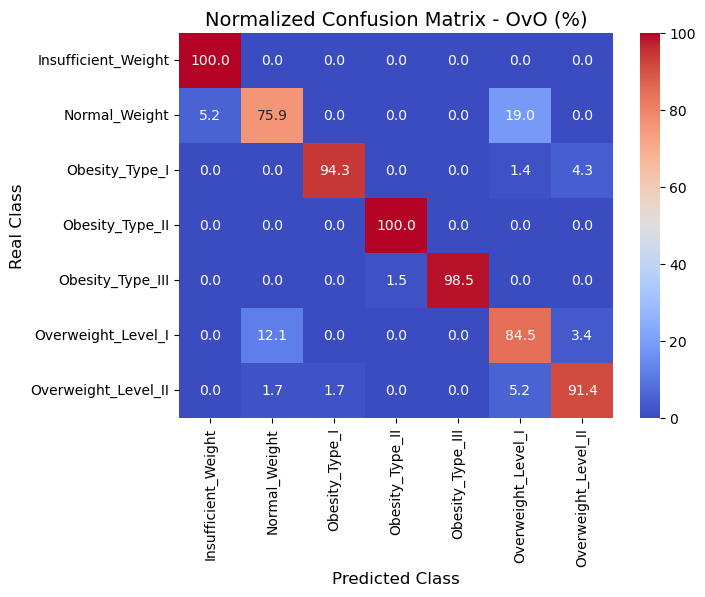

In [21]:
# Normalized Confusion matrix for OvO
cm_ovo = confusion_matrix(y_test, y_pred_ovo, normalize='true') * 100

plt.figure(figsize=(7,5))
sns.heatmap(cm_ovo, annot=True, fmt='.1f', cmap='coolwarm',
           xticklabels=obesity_data['NObeyesdad'].astype('category').cat.categories,
           yticklabels=obesity_data['NObeyesdad'].astype('category').cat.categories)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Real Class", fontsize=12)
plt.title("Normalized Confusion Matrix - OvO (%)", fontsize=14)
plt.show()



This matrix shows fewer errors of predictions and a stronger diagonal, which means that this model distinguishes better the obesity classes.

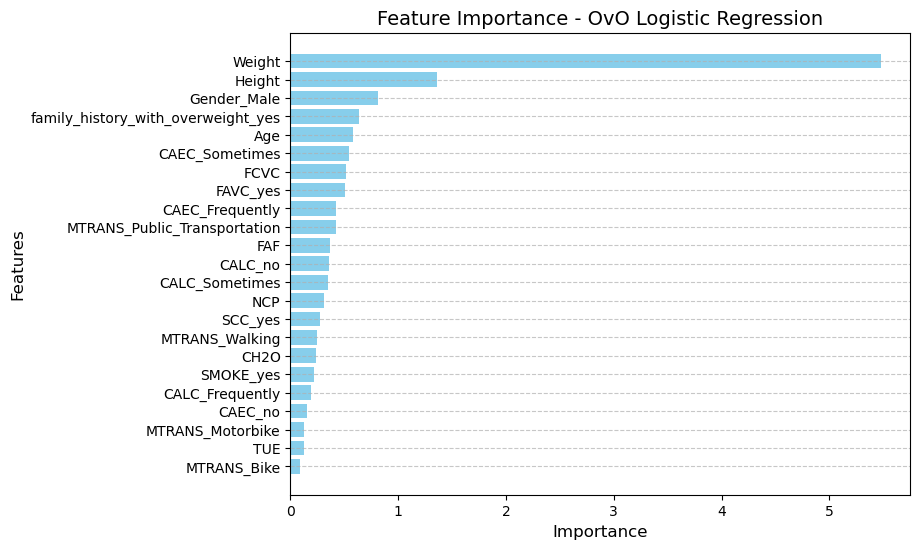

Top 3 most important features for OvA model: ['Weight', 'Height', 'Gender_Male']


In [22]:
# feature importance
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])
feature_importance = np.mean(np.abs(coefs), axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8,6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx],color='skyblue')
plt.gca().invert_yaxis() # the most important at the top 
plt.title("Feature Importance - OvO Logistic Regression", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top3_features = X.columns[sorted_idx][:3]
print("Top 3 most important features for OvA model:", list(top3_features))

* Key features driving predictions are Weight, Height and Gender_Male

## 7. CLASS DISTRIBUTION COMPARISON

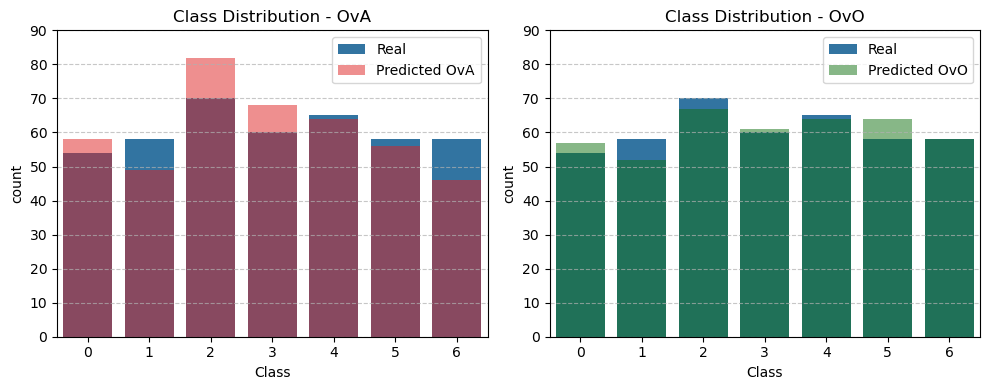

In [23]:
# OvA
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=y_test, label="Real")
sns.countplot(x=y_pred_ova, color='red', alpha=0.5, label="Predicted OvA")
plt.title("Class Distribution - OvA")
plt.xlabel("Class")
plt.ylim(0,90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Ovo
plt.subplot(1,2,2)
sns.countplot(x=y_test, label="Real")
sns.countplot(x=y_pred_ovo, color='green', alpha=0.5, label="Predicted OvO")
plt.title("Class Distribution - OvO")
plt.xlabel("Class")
plt.ylim(0,90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

The comparison between actual and predicted distributions shows that the OvO model closely reproduces the real frequencies of obesity levels, while OvA seems to overestimate some classes (0,2,3) and underestimate others (1,6).  

## 8. PCA Visualization

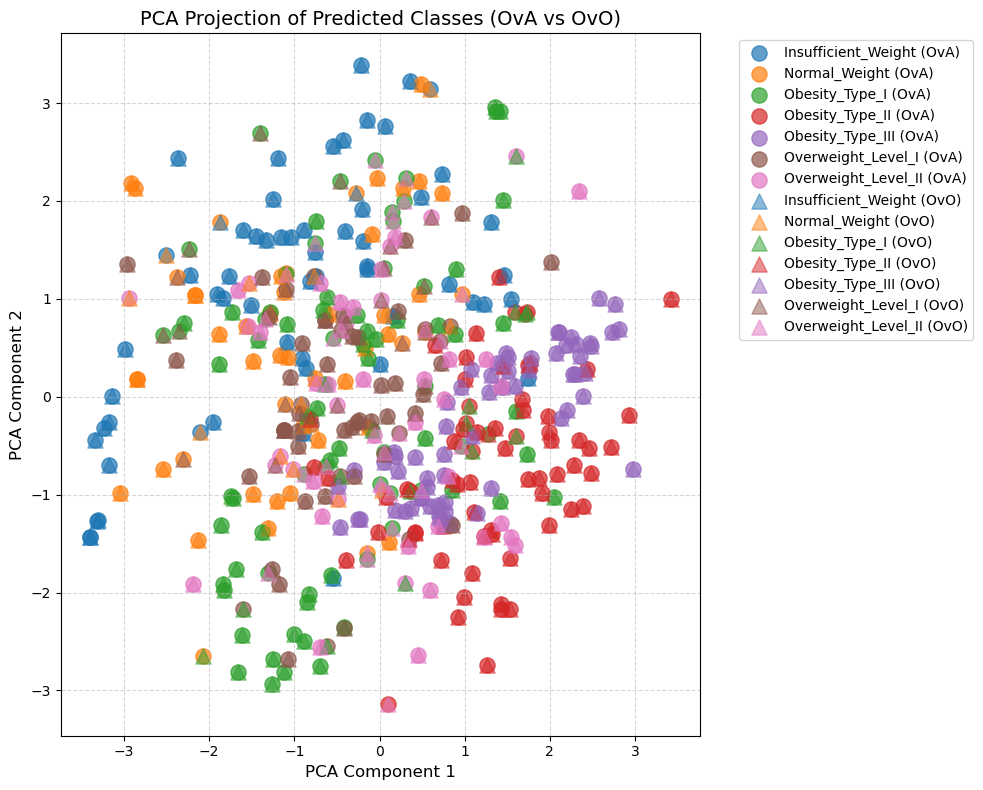

In [24]:
# PCA with 2 components
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Class names
class_labels = obesity_data['NObeyesdad'].astype('category').cat.categories

# Colors for each class
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(class_labels))]

plt.figure(figsize=(10,8))

# Plot OvA predictions with circle markers
for i, label in enumerate(class_labels):
    idx = (y_pred_ova == i)
    plt.scatter(
        X_test_pca[idx, 0], X_test_pca[idx, 1],
        c=[colors[i]], marker='o', alpha=0.7, s=120, label=f"{label} (OvA)"
    )

# Plot OvO predictions with triangle markers
for i, label in enumerate(class_labels):
    idx = (y_pred_ovo == i)
    plt.scatter(
        X_test_pca[idx, 0], X_test_pca[idx, 1],
        c=[colors[i]], marker='^', alpha=0.5, s=120, label=f"{label} (OvO)"
    )

plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.title("PCA Projection of Predicted Classes (OvA vs OvO)", fontsize=14)

# Single legend
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



PCA shows the distribution of classes according to the predictions of OvA and OvO models and provides a low-dimensional projection that helps visually inspect overlap between predicted classes. Compared to OvO, Ova can separate the most extreme classes (Normal Weight and Obesity Type III), but struggles with the central ones (e.g., Overweight & Obesity Type I). 


In [25]:
## Summary:
# Accuracy
accuracy_ova = accuracy_score(y_test, y_pred_ova)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Macro F1-score
macro_f1_ova = f1_score(y_test, y_pred_ova, average='macro')
macro_f1_ovo = f1_score(y_test, y_pred_ovo, average='macro')

# Top 3 classes with lowest F1
# Get per-class F1 scores
f1_per_class_ova = f1_score(y_test, y_pred_ova, average=None)
f1_per_class_ovo = f1_score(y_test, y_pred_ovo, average=None)

# Map back to class names
class_names = list(obesity_data['NObeyesdad'].astype('category').cat.categories)

# Pair class names with F1
f1_pairs_ova = list(zip(class_names, f1_per_class_ova))
f1_pairs_ovo = list(zip(class_names, f1_per_class_ovo))

# Sort by F1 ascending and take 3 lowest
worst3_ova = sorted(f1_pairs_ova, key=lambda x: x[1])[:3]
worst3_ovo = sorted(f1_pairs_ovo, key=lambda x: x[1])[:3]


In [26]:
## Summary:

def print_summary_table():
    models = ["OvA", "OvO"]
    accuracies = [accuracy_ova, accuracy_ovo]
    macro_f1s = [macro_f1_ova, macro_f1_ovo]
    worst_classes = [worst3_ova, worst3_ovo]

    print(f"{'Model':<5} | {'Accuracy':<8} | {'Macro F1-score':<13} | Top 3 Classes with Lowest F1")
    print("-"*80)
    
    for i in range(len(models)):
        print(f"{models[i]:<5} | {accuracies[i]*100:>7.2f}% | {macro_f1s[i]:>12.2f} |")
        for cls, f1 in worst_classes[i]:
            print(f"{'':<31}- {cls}: {f1:.2f}")
        print("-"*80)

print_summary_table()


Model | Accuracy | Macro F1-score | Top 3 Classes with Lowest F1
--------------------------------------------------------------------------------
OvA   |   76.12% |         0.75 |
                               - Overweight_Level_II: 0.52
                               - Overweight_Level_I: 0.60
                               - Normal_Weight: 0.65
--------------------------------------------------------------------------------
OvO   |   92.20% |         0.92 |
                               - Normal_Weight: 0.80
                               - Overweight_Level_I: 0.80
                               - Overweight_Level_II: 0.91
--------------------------------------------------------------------------------


## 9. CONCLUSIONS
- Multi-Class logistic regression models (OvA and OvO) can predict obesity levels with good accuracy
- The OvO model is more precise, making it more suitable in clinical contexts where distinguishing between obesity levels has specific implications. This ensures that predictions do not overestimate or underestimate certain risk categories, critical for resource allocation. 
- The most important features  (e.g., Weight, Height and Gender) are easy to measure for clinical purposes. This indicator could be the base for guiding targeted prevention programs (e.g., standardized weight/height screening for children and adults, gender specific awareness campaigns)

## 10. LIMITATIONS:
- No causal interpretation: the model cannot determine whether a variable causes obesity.
- Self-reported data Bias: lifestyle variables (diet, physical activity) are self-reported and may contain bias or inaccuracies.
- The dataset may not represent all demographic groups equally.
- The model should be considered a "decision-support tool", rather than a diagnostic system. 

## 11. OUTLOOK:
- Compare logistic regression with more complex models such as Random Forests.
- Test the model on a different population or dataset to assess generalizability.
- Weight and height strongly dominate predictions, potentially masking the contribution of lifestyle variables.
- This is not a diagnostic system and a clinical judgment remains essential.